* Barış Sunar
* Damla Sude Özpolat
* Tanay Tekön

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("income_evaluation.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'income_evaluation.csv'

# Verinin Analizi

In [ ]:
df.shape

(32561, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


* Eksik değer bulunmamaktadır.

In [ ]:
df.head()

age          workclass   fnlwgt   education   education-num  \
0   39          State-gov    77516   Bachelors              13   
1   50   Self-emp-not-inc    83311   Bachelors              13   
2   38            Private   215646     HS-grad               9   
3   53            Private   234721        11th               7   
4   28            Private   338409   Bachelors              13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

    capital-gain   capital-loss   hours-per-week  native-country  income  
0           2174              0               40   United-States   <=50K  
1              0              0               13   United-States   <=50K  
2              0              0               40   United-States   <=50K  
3              0              0               40   United-States   <=50K  
4              0              0               40            Cuba   <=50K

In [ ]:
df.describe()

age        fnlwgt   education-num   capital-gain  \
count  32561.000000  3.256100e+04    32561.000000   32561.000000   
mean      38.581647  1.897784e+05       10.080679    1077.648844   
std       13.640433  1.055500e+05        2.572720    7385.292085   
min       17.000000  1.228500e+04        1.000000       0.000000   
25%       28.000000  1.178270e+05        9.000000       0.000000   
50%       37.000000  1.783560e+05       10.000000       0.000000   
75%       48.000000  2.370510e+05       12.000000       0.000000   
max       90.000000  1.484705e+06       16.000000   99999.000000   

        capital-loss   hours-per-week  
count   32561.000000     32561.000000  
mean       87.303830        40.437456  
std       402.960219        12.347429  
min         0.000000         1.000000  
25%         0.000000        40.000000  
50%         0.000000        40.000000  
75%         0.000000        45.000000  
max      4356.000000        99.000000

### Değişken isimlerinin ve tüm değerlerin değiştirilmesi

In [ ]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
              'marital-status', 'occupation', 'relationship', 'race', 'sex',
              'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
              'income']

In [ ]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

### Income değişkeninin kodlanması

In [ ]:
from sklearn.preprocessing import LabelEncoder
df["income"] = LabelEncoder().fit_transform(df["income"].values)

### Check unique values for all columns

In [ ]:
for column in df.columns:
    print(column, len(df[column].unique()))

age 73
workclass 9
fnlwgt 21648
education 16
education-num 16
marital-status 7
occupation 15
relationship 6
race 5
sex 2
capital-gain 119
capital-loss 92
hours-per-week 94
native-country 42
income 2


### Seperate numeric and categorical features

In [ ]:
categorical_features = ['workclass', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'income', 'native-country']

numeric_features = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

### Unique values for categorical features

In [ ]:
for column in categorical_features:
    print(column+":")
    print(df[column].value_counts())
    print()

workclass:
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

education:
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

education-num:
9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64

marital-status:
Married-civ-spouse       14976
Never-married            10683
Divorced  

### Check education and education-num relation

In [ ]:
for i in range(1,17):
    check_df = df[df['education-num'] == i]
    print(i , ":")
    print(check_df['education'].value_counts())
    print()

1 :
Preschool    51
Name: education, dtype: int64

2 :
1st-4th    168
Name: education, dtype: int64

3 :
5th-6th    333
Name: education, dtype: int64

4 :
7th-8th    646
Name: education, dtype: int64

5 :
9th    514
Name: education, dtype: int64

6 :
10th    933
Name: education, dtype: int64

7 :
11th    1175
Name: education, dtype: int64

8 :
12th    433
Name: education, dtype: int64

9 :
HS-grad    10501
Name: education, dtype: int64

10 :
Some-college    7291
Name: education, dtype: int64

11 :
Assoc-voc    1382
Name: education, dtype: int64

12 :
Assoc-acdm    1067
Name: education, dtype: int64

13 :
Bachelors    5355
Name: education, dtype: int64

14 :
Masters    1723
Name: education, dtype: int64

15 :
Prof-school    576
Name: education, dtype: int64

16 :
Doctorate    413
Name: education, dtype: int64



* These two attributes are same, so we can drop education column
* Clustering can be done to education_num(too many values)

In [ ]:
def categorize_education(education_level):
    if education_level in ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-acdm', 'Assoc-voc']:
        return 'High School Graduation'
    elif education_level in ['Bachelors']:
        return "Bachelor's Degree"
    elif education_level in ['Masters']:
        return "Master's Degree"
    elif education_level in ['Doctorate', 'Prof-school']:
        return 'Advanced Degree'
    else:
        return 'Other'

In [ ]:
df_2 = df.copy()
df_2["edu-cat"] = df_2["education"].apply(categorize_education)

In [ ]:
df = df.drop(columns=['education'])
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [ ]:
"""
total_prof_specialty = df[df['occupation'] == ' Prof-specialty'].count()['occupation']

# Calculate the number of individuals in the "Prof-specialty" category who earn more than 50k a year
prof_specialty_50k_plus = df[(df['occupation'] == ' Prof-specialty') & (df['income'] == 1)].count()['occupation']

# Calculate the percentage
percentage_prof_specialty_50k_plus = (prof_specialty_50k_plus / total_prof_specialty) * 100

# Print the result
print(percentage_prof_specialty_50k_plus)
"""

'\ntotal_prof_specialty = df[df[\'occupation\'] == \' Prof-specialty\'].count()[\'occupation\']\n\n# Calculate the number of individuals in the "Prof-specialty" category who earn more than 50k a year\nprof_specialty_50k_plus = df[(df[\'occupation\'] == \' Prof-specialty\') & (df[\'income\'] == 1)].count()[\'occupation\']\n\n# Calculate the percentage\npercentage_prof_specialty_50k_plus = (prof_specialty_50k_plus / total_prof_specialty) * 100\n\n# Print the result\nprint(percentage_prof_specialty_50k_plus)\n'

### Seperate nominal, ordinal, and numeric features

In [ ]:
nominal_features = ['workclass', 'marital-status', 'occupation',
                    'relationship', 'race', 'sex',
                    'income', 'native-country']

ordinal_features = ['education_num']

numeric_features = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

### Check '?' values in occupation and workclass columns

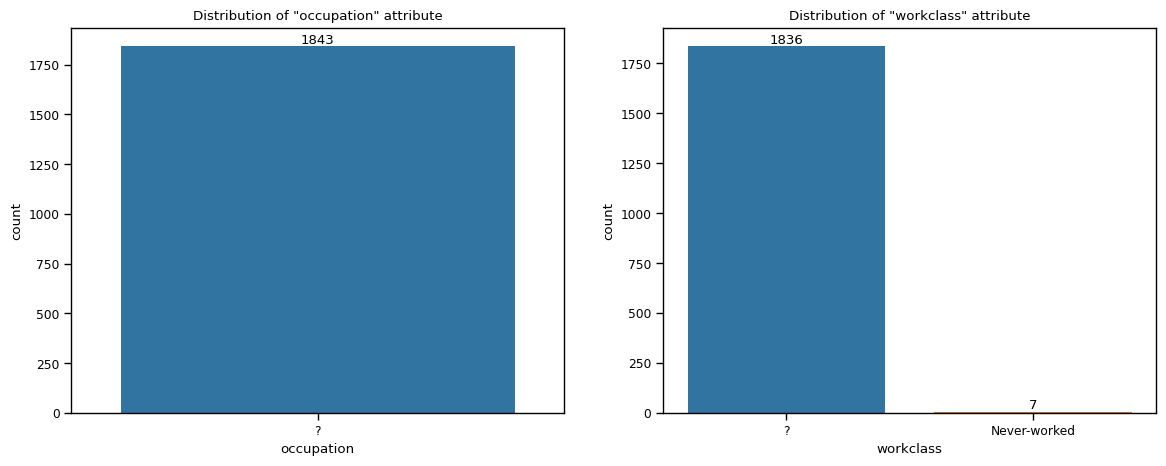

In [ ]:
# Df of ? values in occupation and workclass columns
nan_values_df = df[(df['occupation'] == '?') | (df['workclass'] == '?')]

# Distribution of 'occupation' attribute
fig, ax = plt.subplots(1,2,figsize=(14,5))
sns.countplot(x=nan_values_df['occupation'], ax=ax[0])
ax[0].set_title('Distribution of "occupation" attribute')
ax[0].bar_label(ax[0].containers[0])

# Distribution of 'workclass' attribute
sns.countplot(x=nan_values_df['workclass'], ax=ax[1])
ax[1].set_title('Distribution of "workclass" attribute')
ax[1].bar_label(ax[1].containers[0])
plt.show()


### Change workclass to ' Never-worked' when occupation is never-worked

In [ ]:
df.loc[df['workclass'] == 'Never-worked', 'occupation'] = 'Never-worked'

### Drop missing values

In [ ]:
df.shape

(32561, 14)

In [ ]:
len(df[(df['occupation'] == '?') | (df['workclass'] == '?') | (df['native-country'] == '?')])

2392

In [ ]:
df = df.drop(df[df['occupation'] == '?'].index)
df = df.drop(df[df['workclass'] == '?'].index)
df = df.drop(df[df['native-country'] == '?'].index)

In [ ]:
len(df[(df["relationship"]=="Husband")&(df["income"]==1)] )/ len(df[(df["relationship"]=="Husband")] )

0.45566877958757923

In [ ]:
len(df[(df["relationship"]=="Wife")&(df["income"]==1)] )/ len(df[(df["relationship"]=="Wife")] )

0.49324804548685147

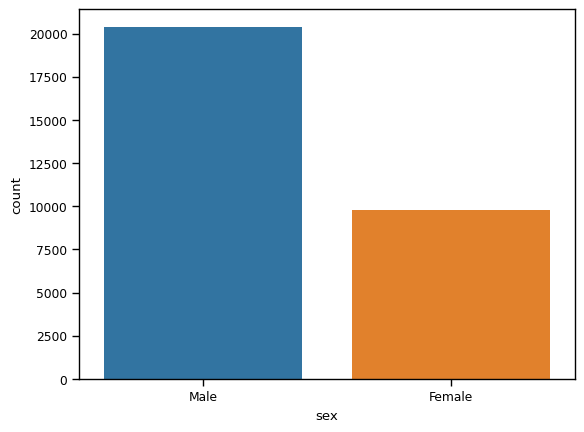

In [ ]:
fig, ax = plt.subplots()
sns.countplot(x=df['sex'], ax=ax)
plt.show()

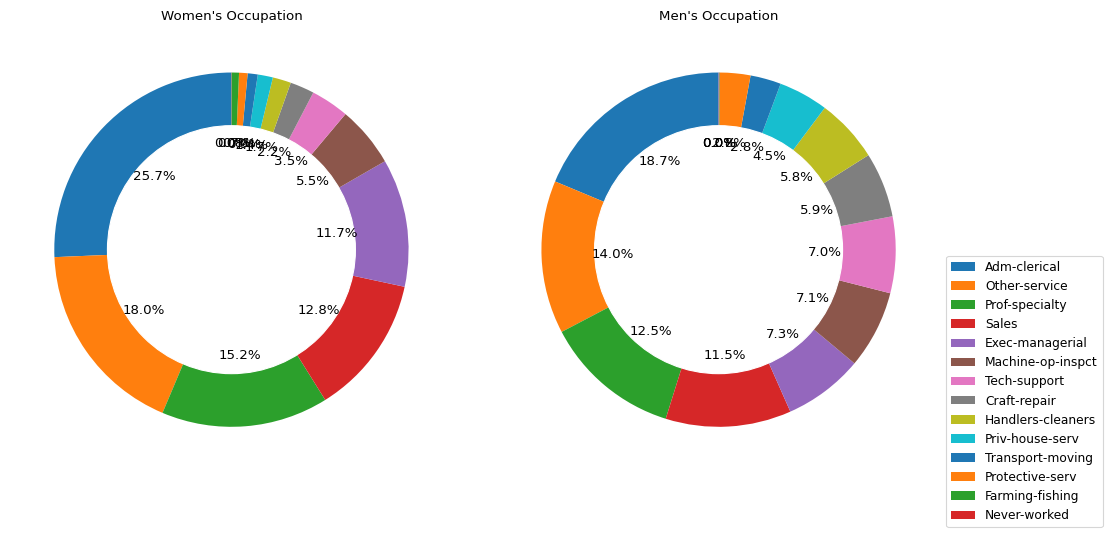

In [ ]:
from matplotlib.patches import Circle
from matplotlib.gridspec import GridSpec

women_data = df[df['sex'] == 'Female']
men_data = df[df['sex'] == 'Male']

women_occupation_counts = women_data['occupation'].value_counts()
men_occupation_counts = men_data['occupation'].value_counts()

fig = plt.figure(figsize=(12, 6))
grid = GridSpec(1, 2, width_ratios=[1, 1])

# Plot the pie chart for women's occupation
ax1 = plt.subplot(grid[0], aspect='equal')
wedges1, texts1, _ = ax1.pie(women_occupation_counts, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
ax1.set_title("Women's Occupation")

# Plot the pie chart for men's occupation
ax2 = plt.subplot(grid[1], aspect='equal')
wedges2, texts2, _ = ax2.pie(men_occupation_counts, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
ax2.set_title("Men's Occupation")

# Create filled circles around the pie charts
circle1 = Circle((0, 0), 0.7, color='white', fill=True)
circle2 = Circle((0, 0), 0.7, color='white', fill=True)
ax1.add_patch(circle1)
ax2.add_patch(circle2)

ax2.legend(wedges1, women_occupation_counts.index, loc='upper left', bbox_to_anchor=(1, 0.5))
plt.subplots_adjust(wspace=0.1)
plt.show()

<ipython-input-139-e393604b5cc0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, bins=10, color='blue')


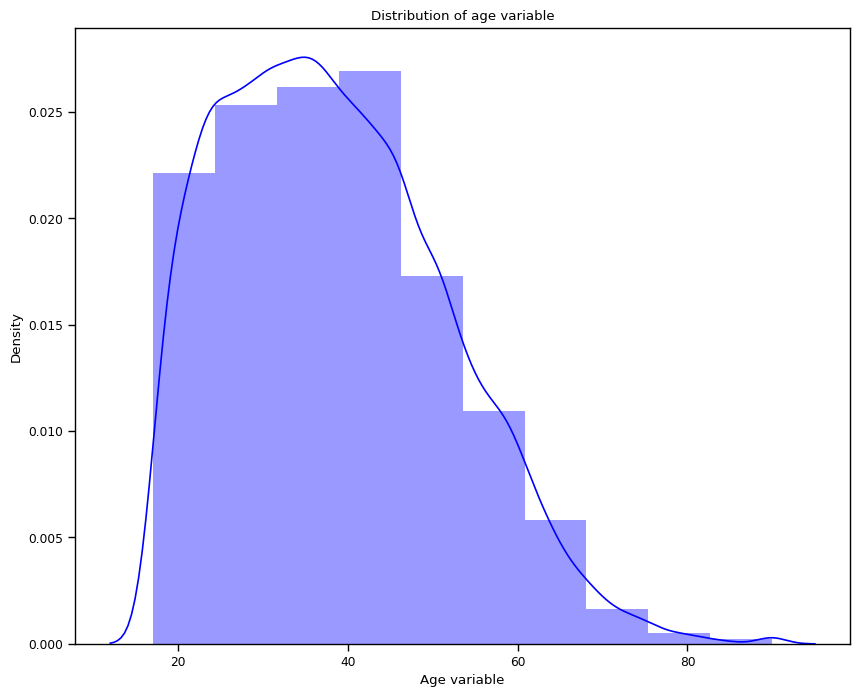

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
x = df['age']
x = pd.Series(x, name="Age variable")
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of age variable")
plt.show()

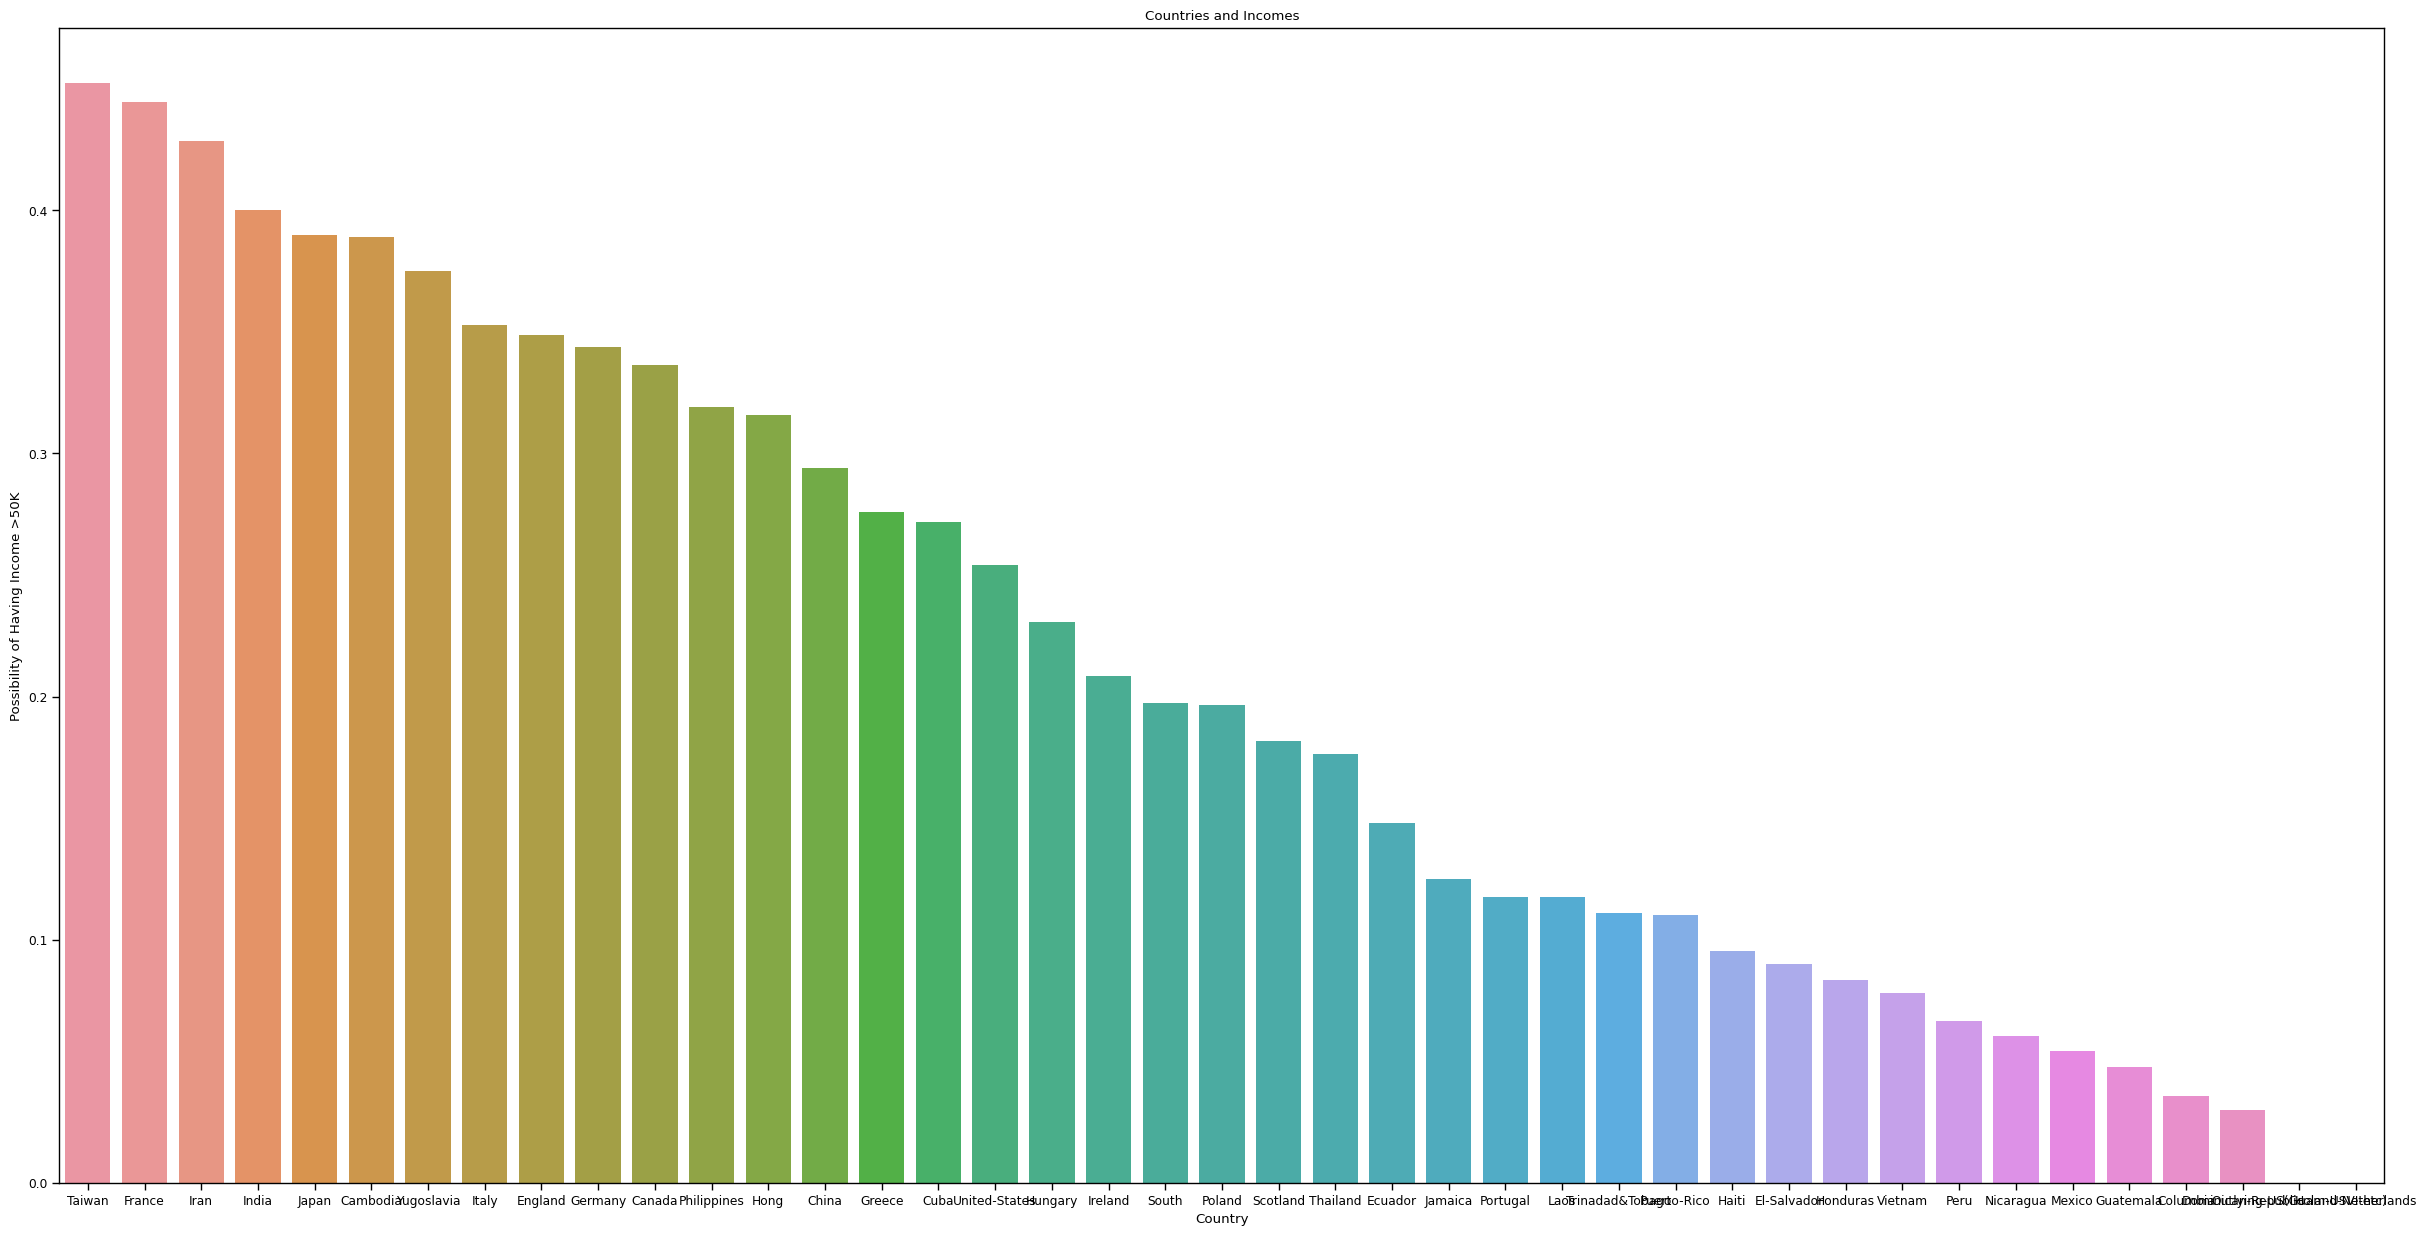

In [ ]:
country_group = df[df["native-country"]!="?"].groupby('native-country')['income'].mean().reset_index()

# Sort the dfFrame based on 'income' values
country_group = country_group.sort_values(by='income', ascending=False)

# Set 'native-country' as the index for plotting
country_group.set_index('native-country', inplace=True)

# Plotting using seaborn
plt.figure(figsize=(30,15))
sns.dark_palette("seagreen")
sns.barplot(x=country_group.index, y=country_group['income'],)
plt.xlabel('Country')
plt.ylabel('Possibility of Having Income >50K')
plt.title('Countries and Incomes')
plt.show()

* Top 3: Taiwan, France, Iran
* Least 3: Dominic, Colombia, Guatemala

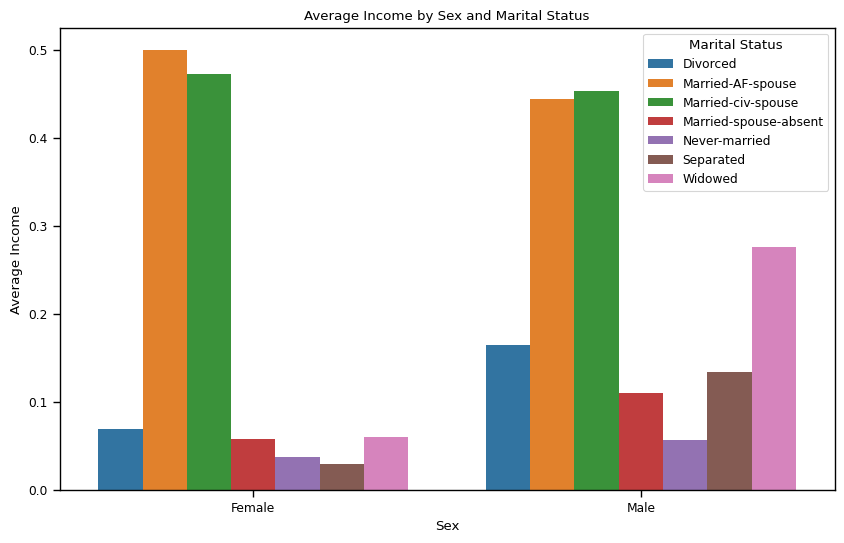

In [ ]:
grouped_df = df.groupby(["sex","marital-status"])["income"].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_df.index.get_level_values('sex'),
            y=grouped_df.values,
            hue=grouped_df.index.get_level_values('marital-status'))
plt.xlabel('Sex')
plt.ylabel('Average Income')
plt.title('Average Income by Sex and Marital Status')
plt.legend(title='Marital Status')
plt.show()

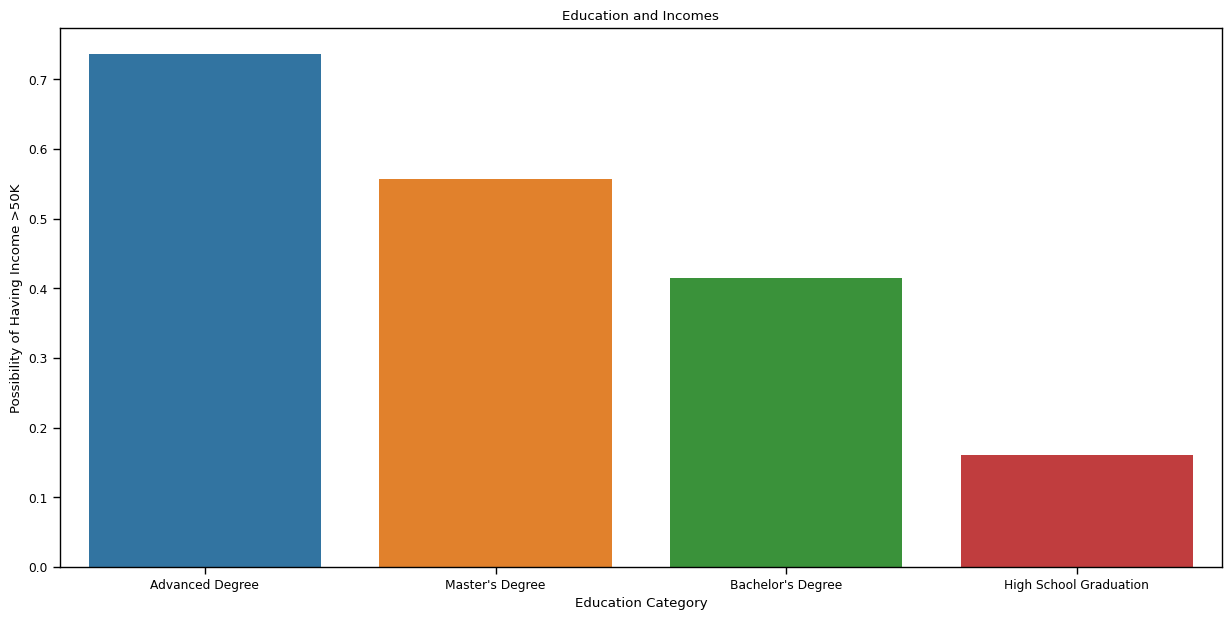

In [ ]:
education_group = df_2[df_2["edu-cat"]!="?"].groupby('edu-cat')['income'].mean().reset_index()

education_group = education_group.sort_values(by='income', ascending=False)

education_group.set_index('edu-cat', inplace=True)

# Plotting using seaborn
plt.figure(figsize=(15,7))
sns.barplot(x=education_group.index, y=education_group['income'])
plt.xlabel('Education Category')
plt.ylabel('Possibility of Having Income >50K')
plt.title('Education and Incomes')
plt.show()

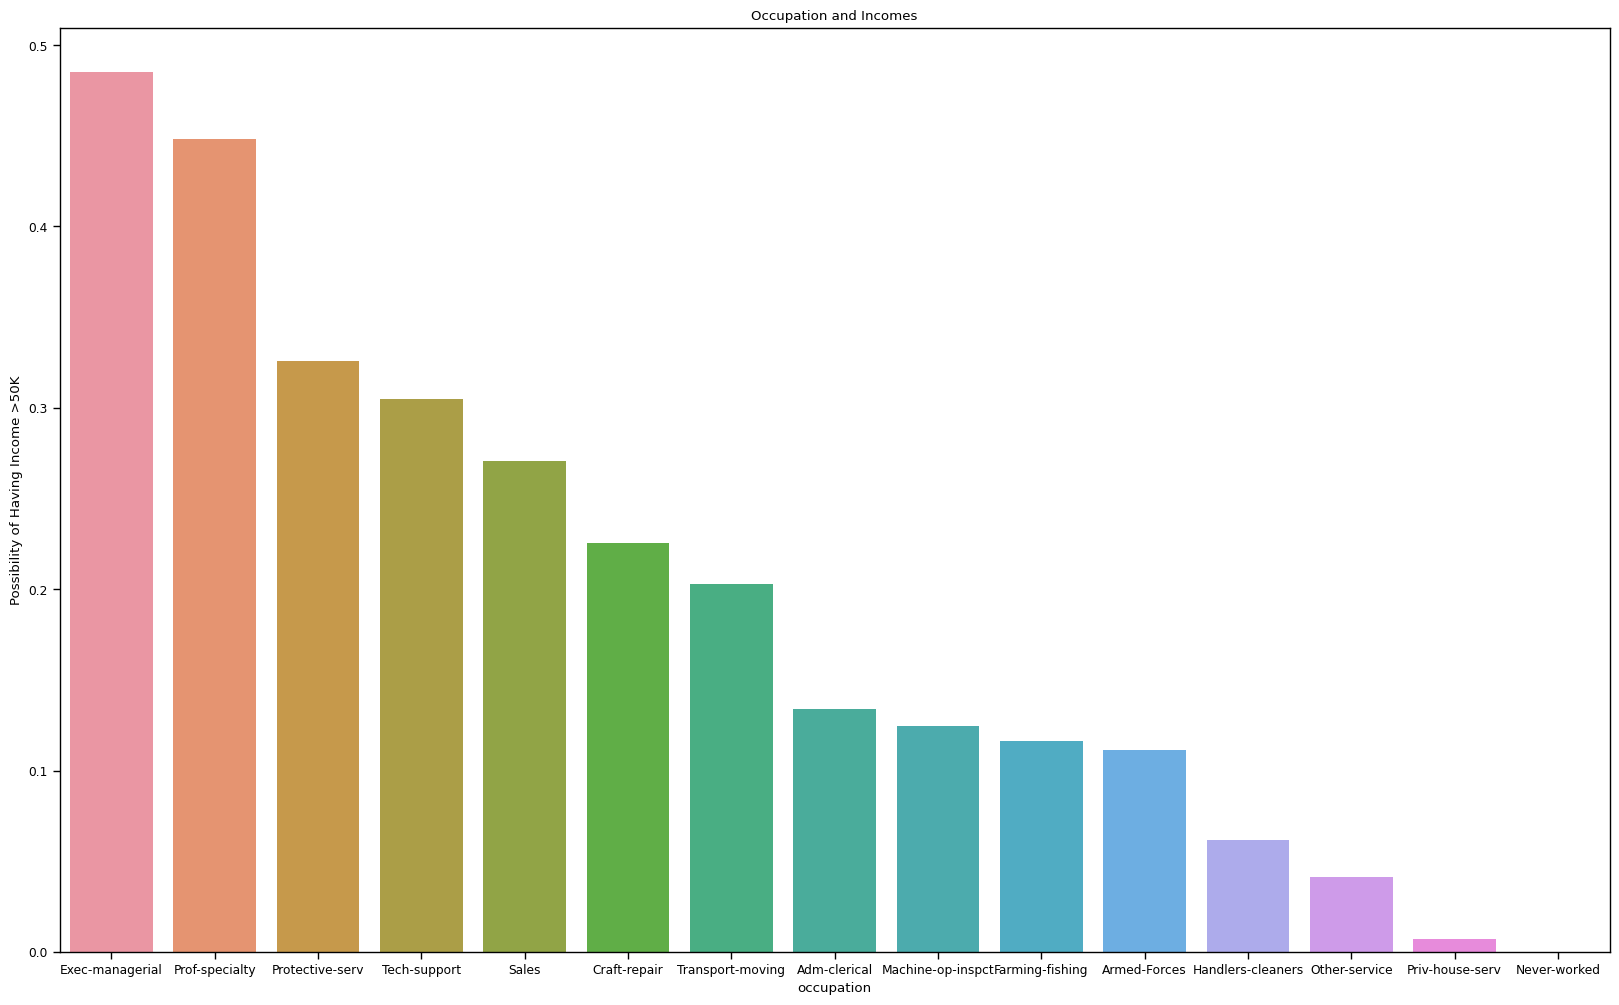

In [ ]:
occupation_group = df[df["occupation"]!="?"].groupby('occupation')['income'].mean().reset_index()

# Sort the DataFrame based on 'income' values
occupation_group = occupation_group.sort_values(by='income', ascending=False)

# Set 'native-country' as the index for plotting
occupation_group.set_index('occupation', inplace=True)

# Plotting using seaborn
plt.figure(figsize=(20,12))
sns.barplot(x=occupation_group.index, y=occupation_group['income'])
plt.xlabel('occupation')
plt.ylabel('Possibility of Having Income >50K')
plt.title('Occupation and Incomes')
plt.show()

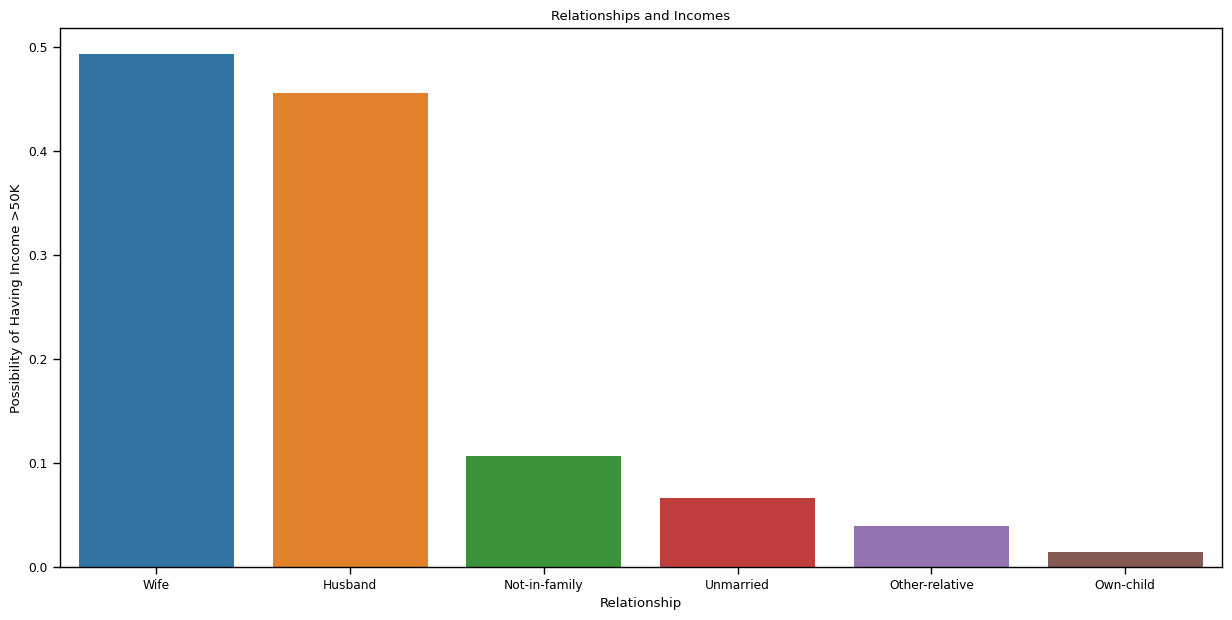

In [ ]:
relationship_group = df[df["relationship"]!="?"].groupby('relationship')['income'].mean().reset_index()

relationship_group = relationship_group.sort_values(by='income', ascending=False)

relationship_group.set_index('relationship', inplace=True)

# Plotting using seaborn
plt.figure(figsize=(15,7))
sns.barplot(x=relationship_group.index, y=relationship_group['income'])
plt.xlabel('Relationship')
plt.ylabel('Possibility of Having Income >50K')
plt.title('Relationships and Incomes')
plt.show()

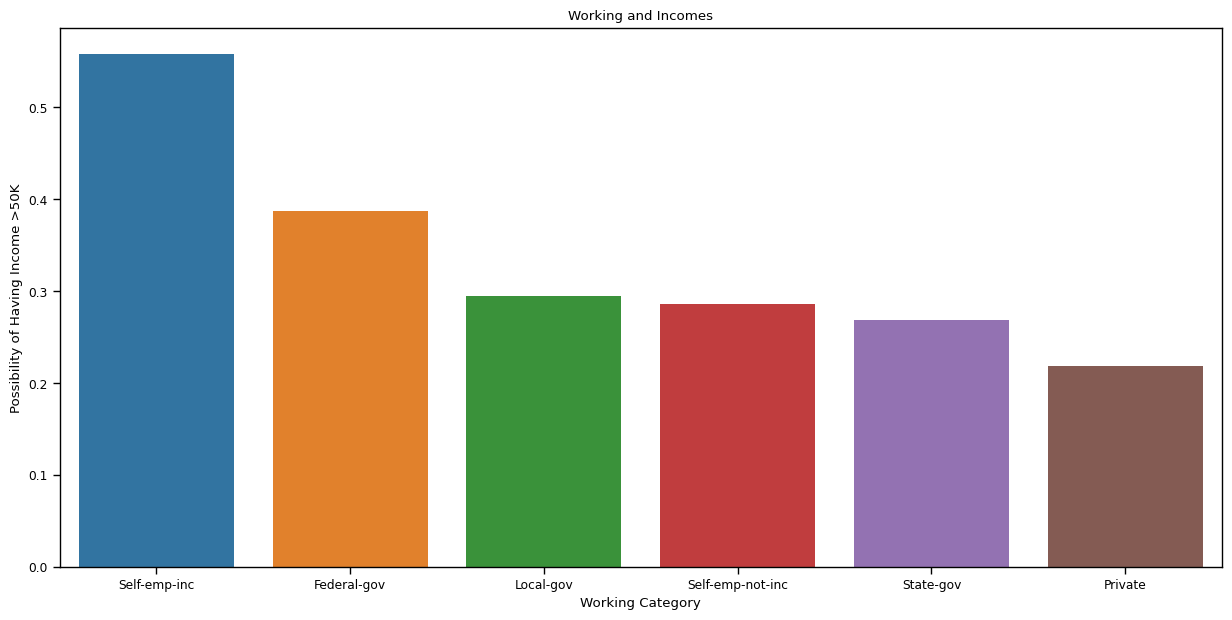

In [ ]:
working_group = df[df["workclass"].isin(["Self-emp-inc","Federal-gov","Local-gov","Self-emp-not-inc","State-gov","Private"])].groupby('workclass')['income'].mean().reset_index()

working_group = working_group.sort_values(by='income', ascending=False)

working_group.set_index('workclass', inplace=True)

# Plotting using seaborn
plt.figure(figsize=(15,7))
sns.barplot(x=working_group.index, y=working_group['income'])
plt.xlabel('Working Category')
plt.ylabel('Possibility of Having Income >50K')
plt.title('Working and Incomes')
plt.show()

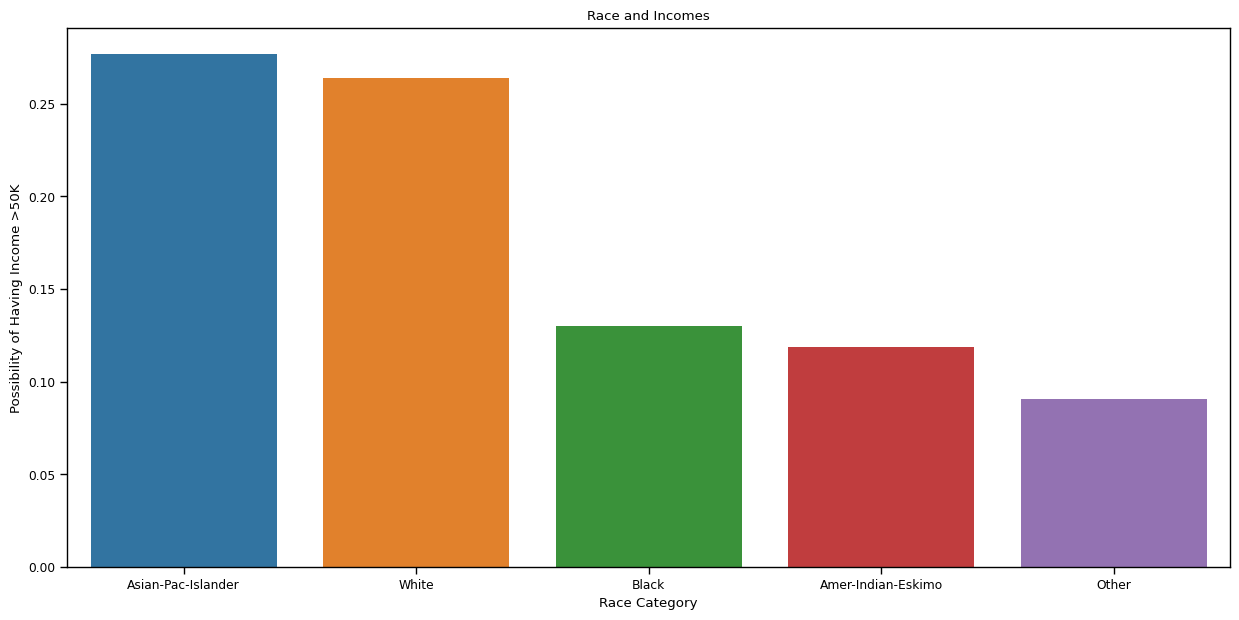

In [ ]:
race_group = df[df["race"]!="?"].groupby('race')['income'].mean().reset_index()

race_group = race_group.sort_values(by='income', ascending=False)

race_group.set_index('race', inplace=True)

# Plotting using seaborn
plt.figure(figsize=(15,7))
sns.barplot(x=race_group.index, y=race_group['income'])
plt.xlabel('Race Category')
plt.ylabel('Possibility of Having Income >50K')
plt.title('Race and Incomes')
plt.show()

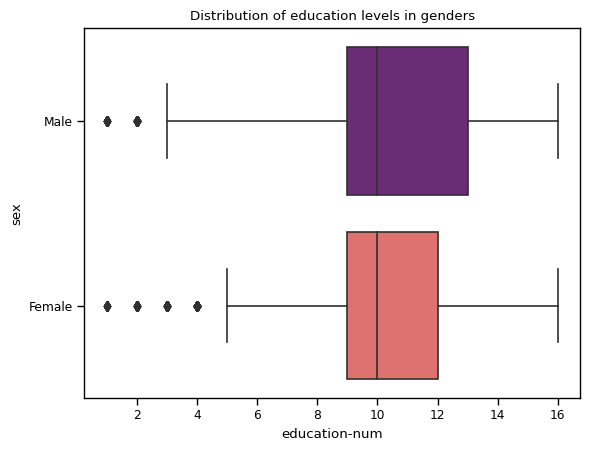

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(x='education-num', y='sex', data=df, palette='magma', ax=ax)
sns.set_context('paper', font_scale = 1)
ax.set_title('Distribution of education levels in genders')
plt.show()

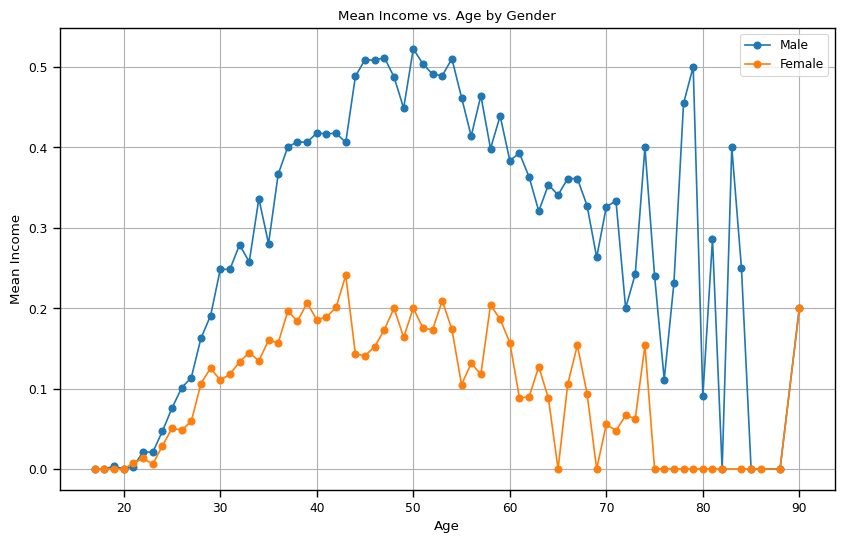

In [ ]:
mean_income_by_age_gender = df.groupby(['age', 'sex'])['income'].mean().reset_index()

# Separate data for male and female
male_data = mean_income_by_age_gender[mean_income_by_age_gender['sex'] == 'Male']
female_data = mean_income_by_age_gender[mean_income_by_age_gender['sex'] == 'Female']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(male_data['age'], male_data['income'], label='Male', marker='o')
plt.plot(female_data['age'], female_data['income'], label='Female', marker='o')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Mean Income')
plt.title('Mean Income vs. Age by Gender')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

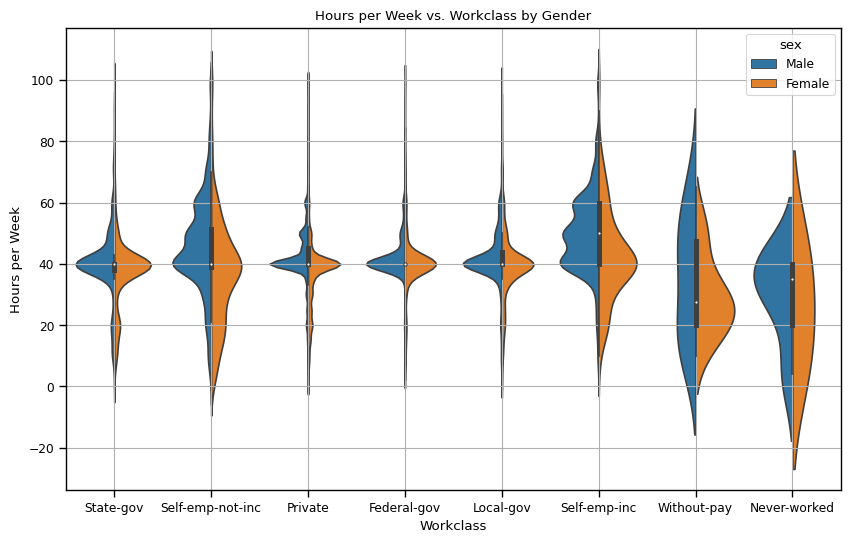

In [ ]:
# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='workclass', y='hours-per-week', hue='sex', data=df, split=True)

# Add labels and title
plt.xlabel('Workclass')
plt.ylabel('Hours per Week')
plt.title('Hours per Week vs. Workclass by Gender')

# Show the plot
plt.grid(True)
plt.show()

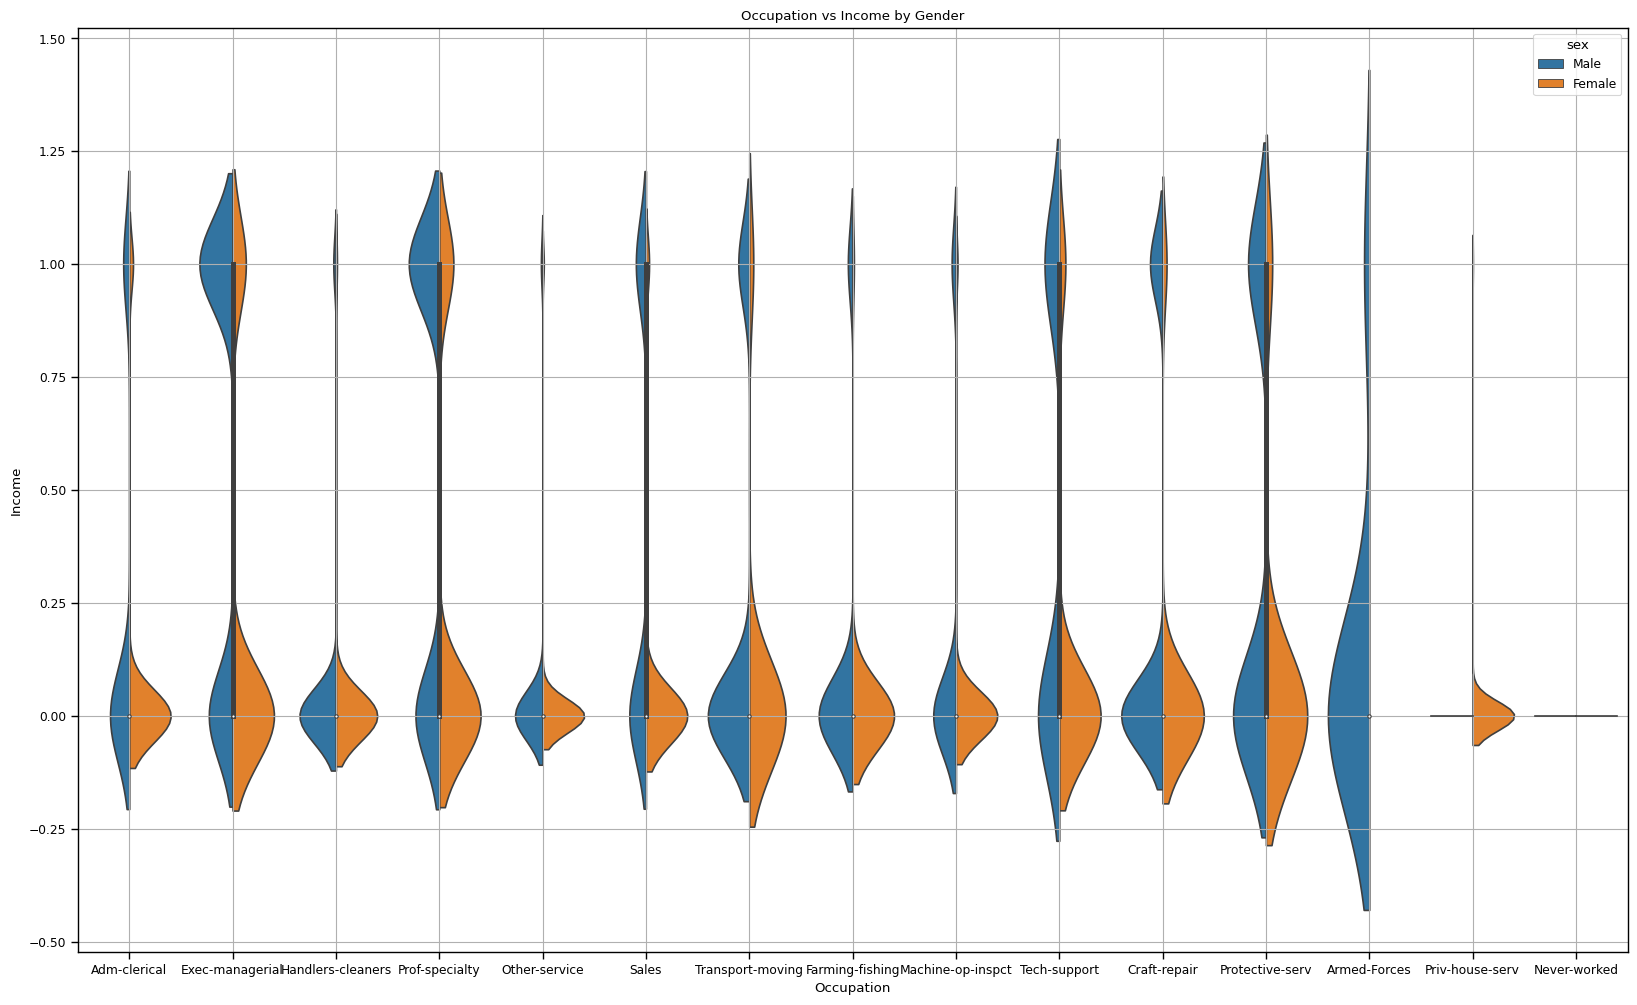

In [ ]:
# Create the violin plot
plt.figure(figsize=(20, 12))
sns.violinplot(x='occupation', y='income', hue='sex', data=df, split=True)

# Add labels and title
plt.xlabel('Occupation')
plt.ylabel('Income')
plt.title('Occupation vs Income by Gender')

# Show the plot
plt.grid(True)
plt.show()

<Axes: xlabel='income', ylabel='education-num'>

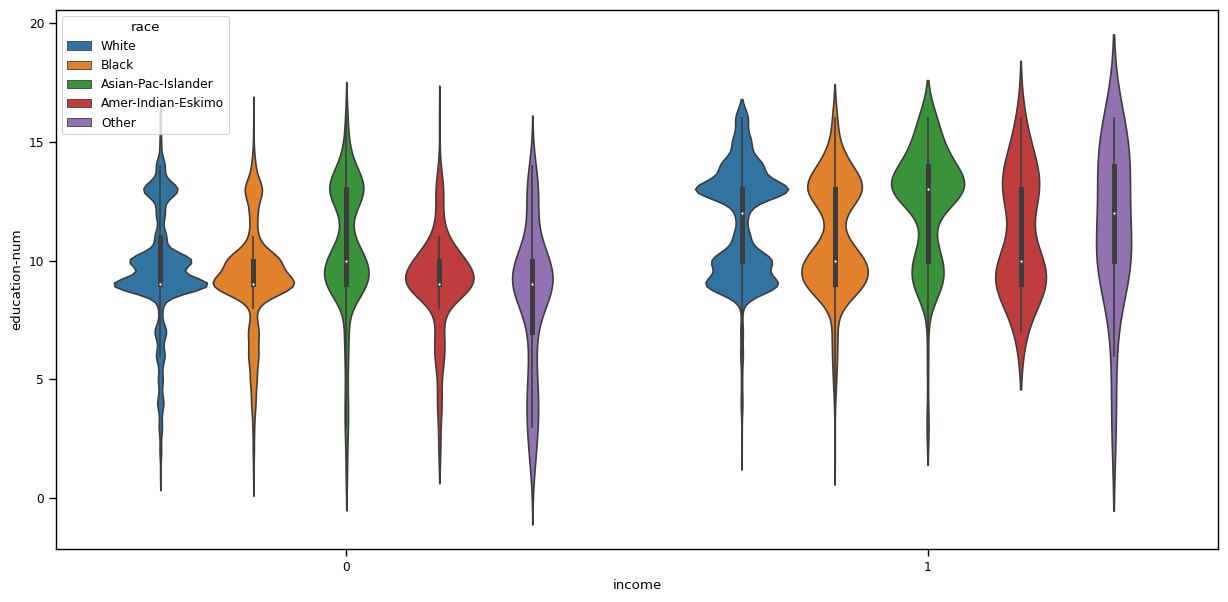

In [ ]:
plt.figure(figsize=(15,7))
sns.violinplot(x='income',y='education-num',data=df,hue='race',jitter=True,pallete='magma')

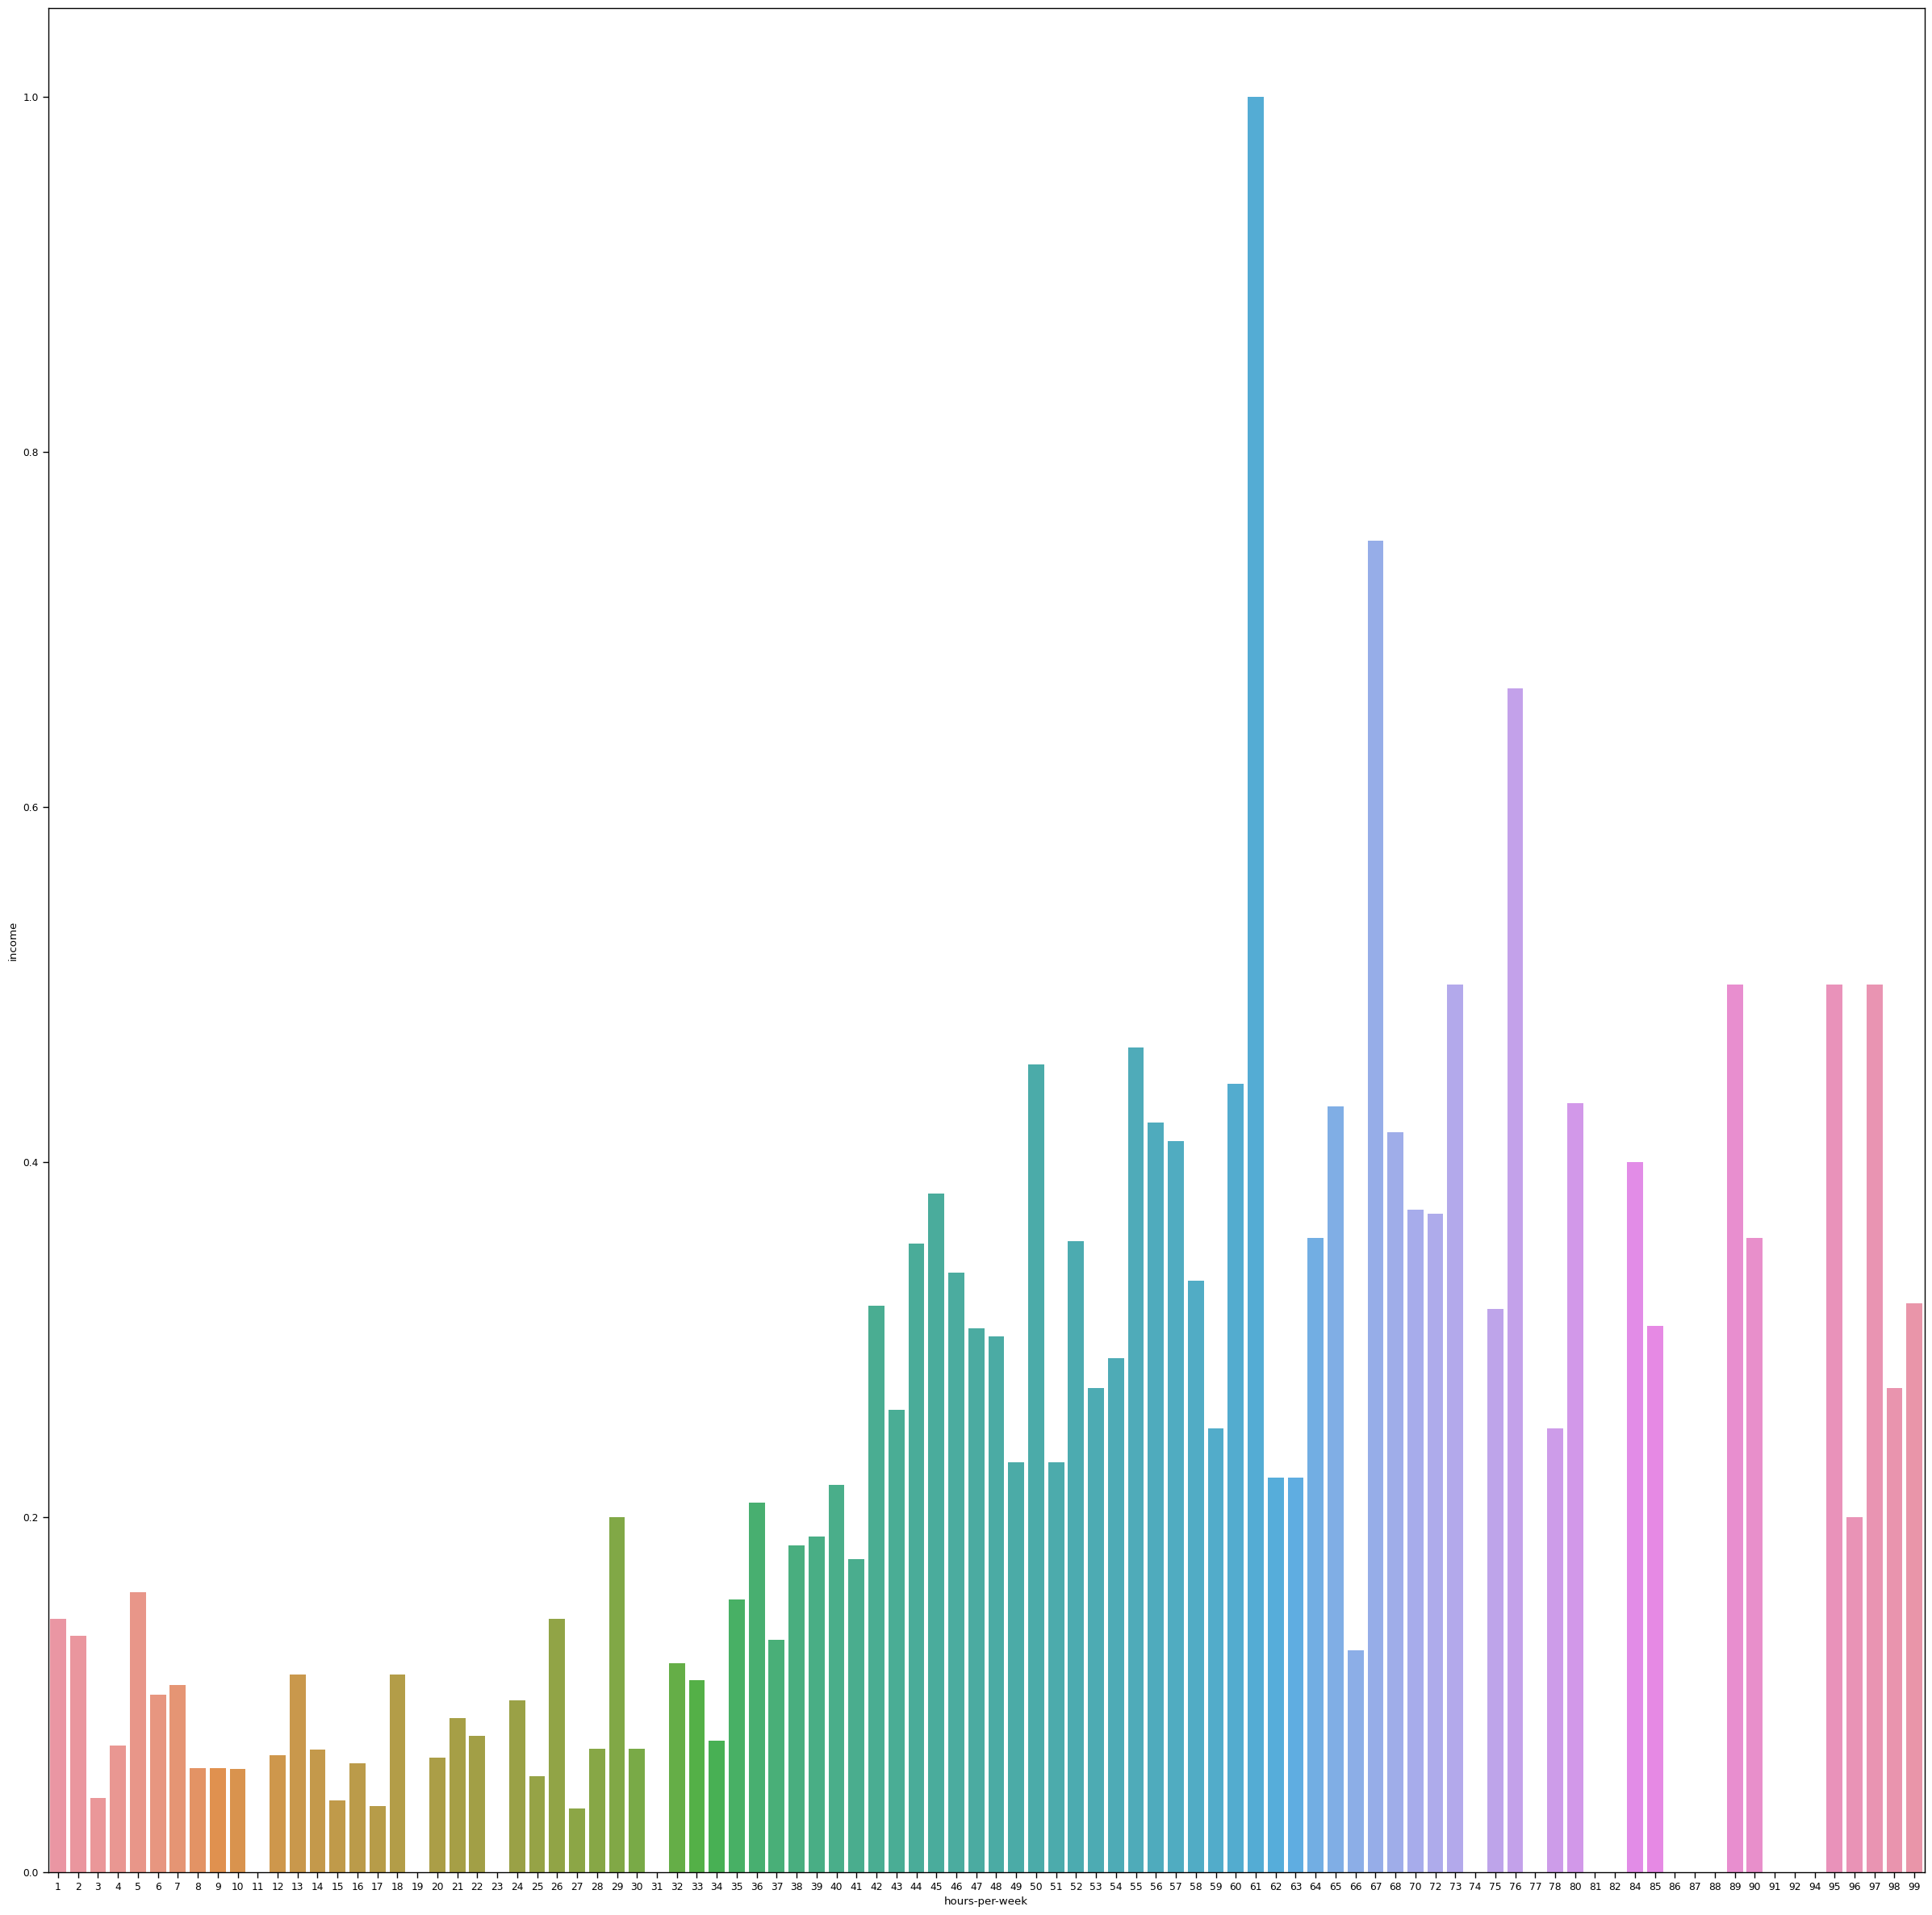

In [ ]:
fig, ax = plt.subplots(figsize=(30,30))
sns.barplot(x='hours-per-week',y='income',data=df,ax=ax,errorbar=None)
sns.set_context('paper', font_scale = 1)
plt.show()

In [ ]:
quartiles = df["hours-per-week"].quantile([0.2,0.4,0.6,0.8])
quartiles

0.2    36.0
0.4    40.0
0.6    40.0
0.8    50.0
Name: hours-per-week, dtype: float64

### Kategorik değişkenlerin kodlanması

In [ ]:
df = pd.get_dummies(df,columns=nominal_features,drop_first=True)
df.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Local-gov', 'workclass_Never-worked',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Never-worked', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'relationship_Not-in-family', '

### Korelasyonların incelenmesi

<Axes: >

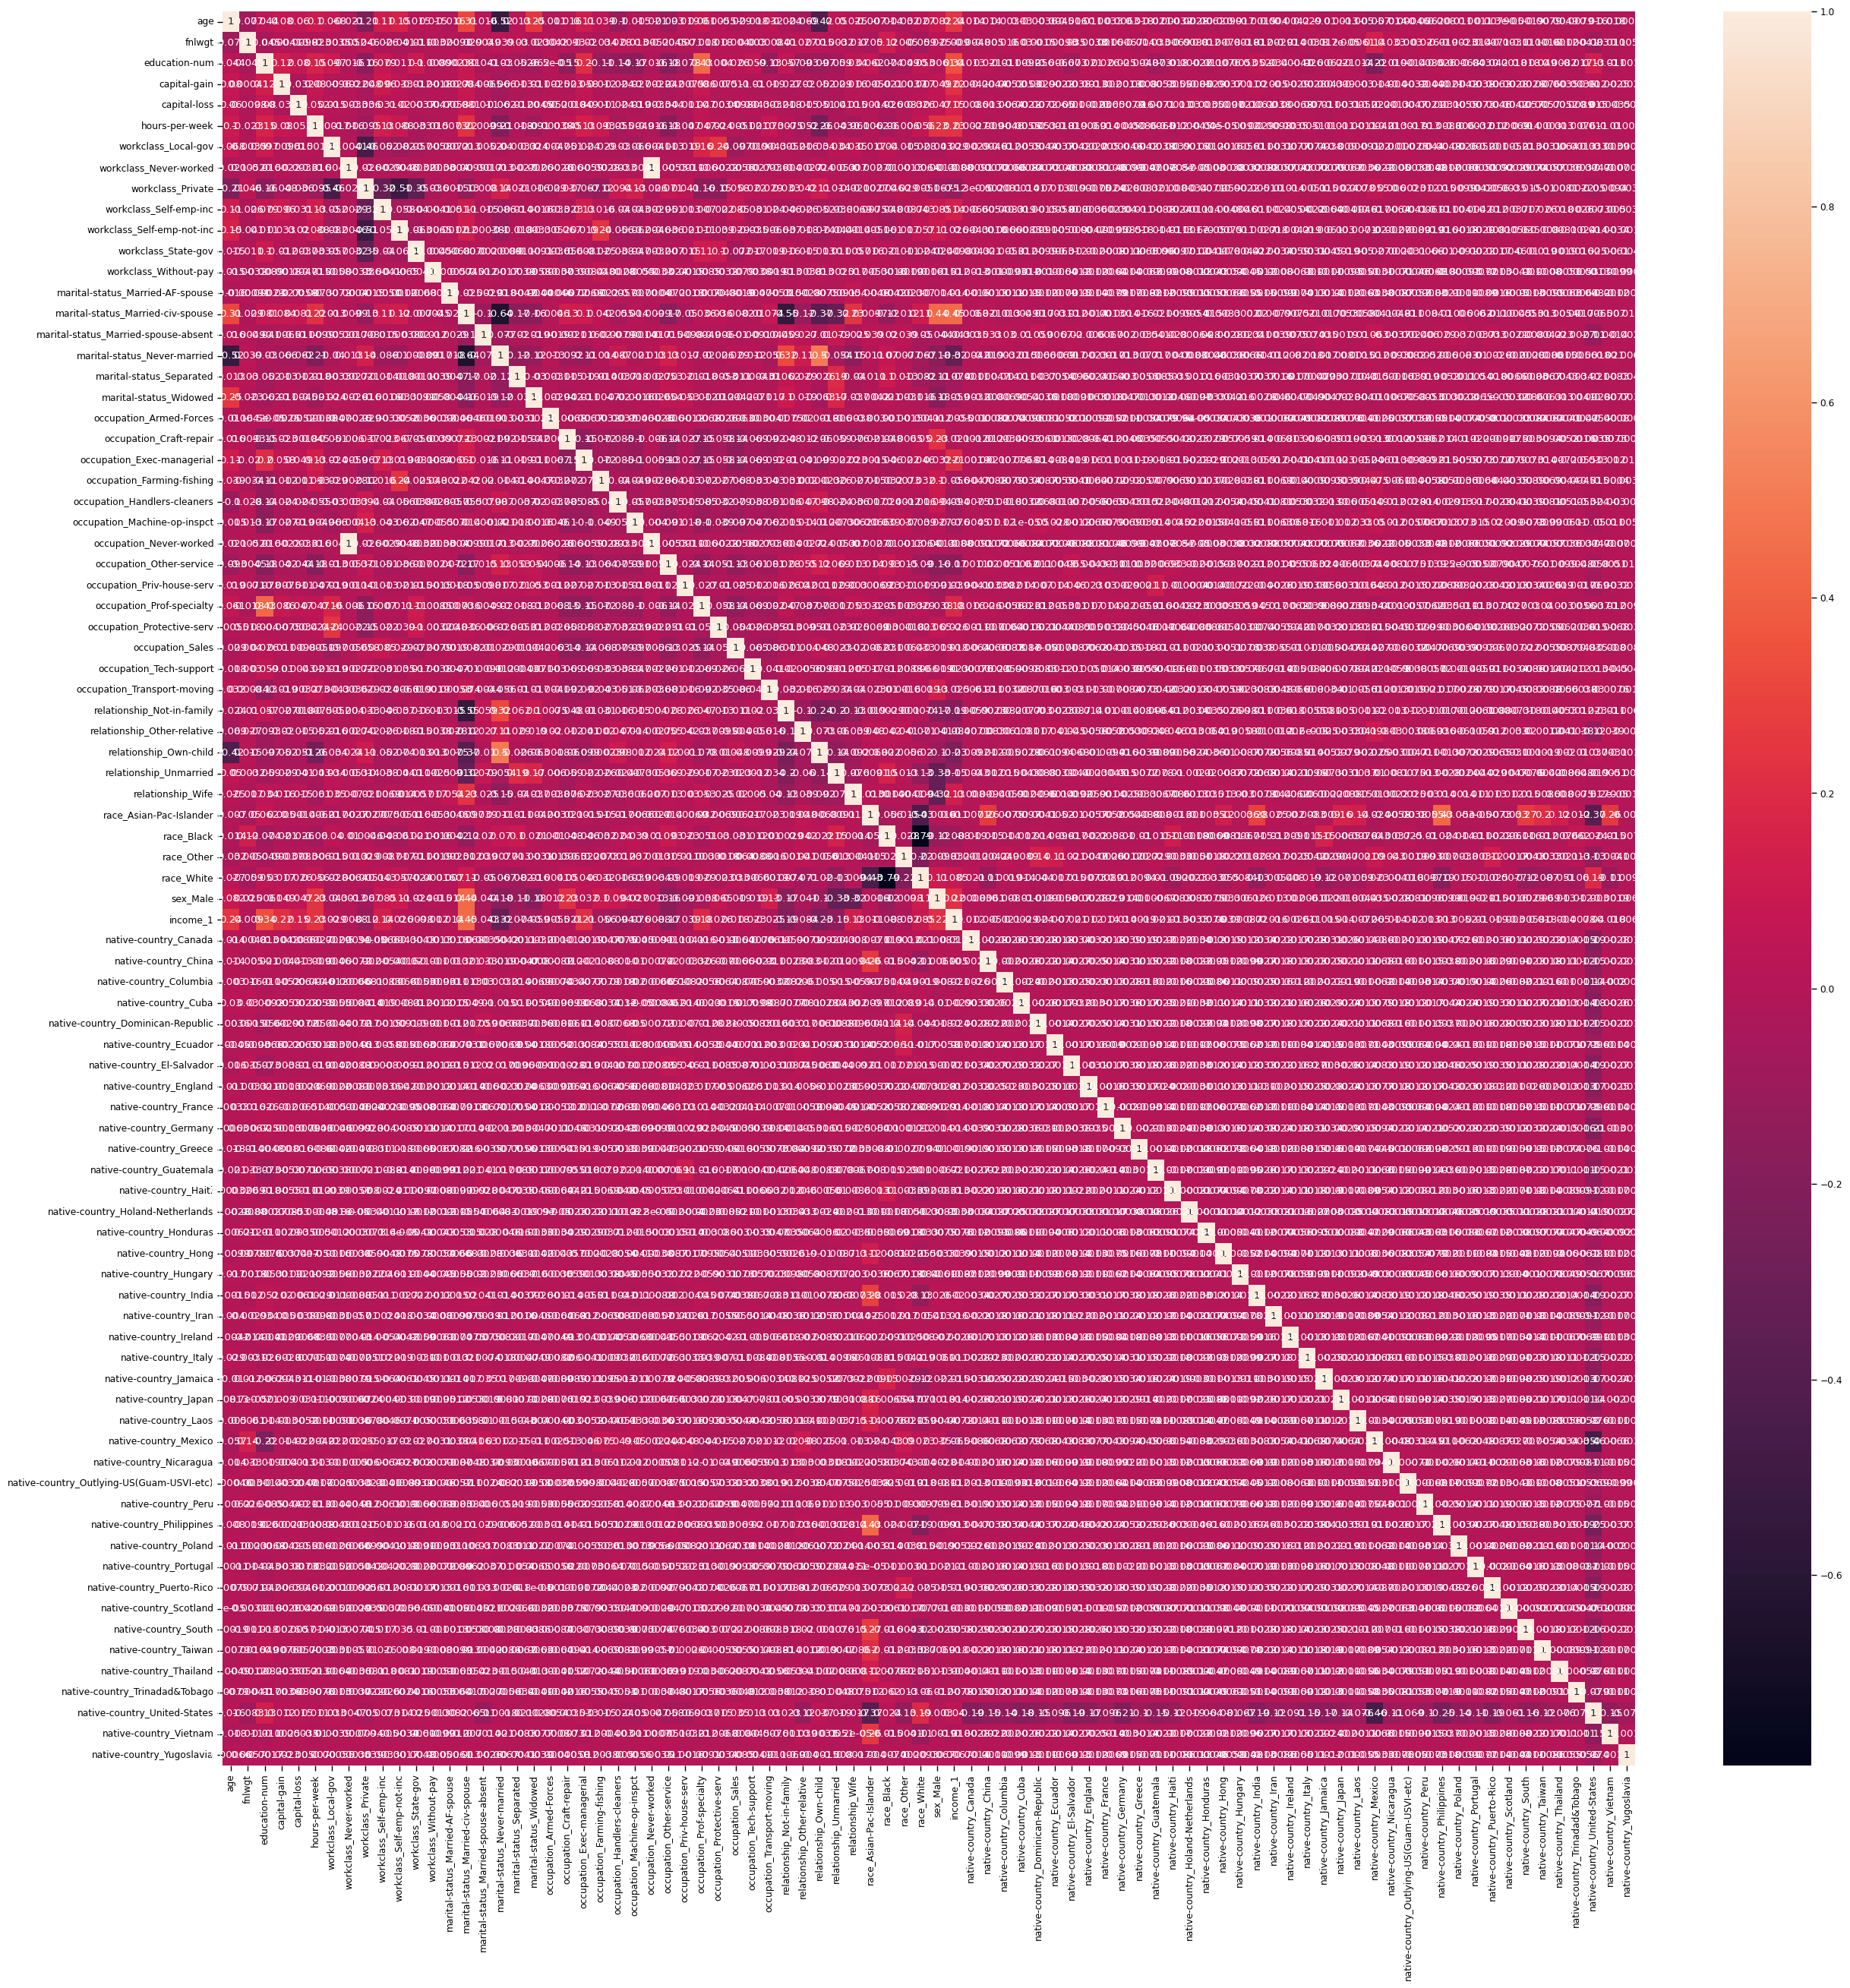

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)

In [ ]:
from scipy.stats import pearsonr

test_columns = list(df.columns)
significant_correlations = []

for col1 in test_columns:
  test_columns.remove(col1)
  for col2 in test_columns:
    if col1.split('_')[0] != col2.split('_')[0]:
      correlation_coefficient, p_value = pearsonr(x=df[col1], y=df[col2])
      # If significant
      if (abs(correlation_coefficient) >= 0.2):
        significant_correlations.append([col1 + " - " + col2, correlation_coefficient])

significant_correlations = sorted(significant_correlations, key=lambda x: abs(x[1]), reverse=True)
corr_df = pd.DataFrame(significant_correlations,
                       columns=['variables', 'coefficient'])
corr_df

variables  coefficient
0   marital-status_Married-civ-spouse - relationsh...    -0.546280
1                  age - marital-status_Never-married    -0.524113
2   marital-status_Never-married - relationship_Ow...     0.497323
3        marital-status_Married-civ-spouse - income_1     0.445440
4        marital-status_Married-civ-spouse - sex_Male     0.437278
5   race_Asian-Pac-Islander - native-country_Phili...     0.428056
6           education-num - occupation_Prof-specialty     0.427038
7                        age - relationship_Own-child    -0.420910
8   race_Asian-Pac-Islander - native-country_Unite...    -0.374365
9   marital-status_Married-civ-spouse - relationsh...    -0.374316
10                           education-num - income_1     0.335344
11                  relationship_Unmarried - sex_Male    -0.326301
12  marital-status_Married-civ-spouse - relationsh...    -0.322615
13            marital-status_Never-married - income_1    -0.320092
14                       sex_Male - relationship_Wife    -0.318917
15  marital-status_Never-married - relationship_No...     0.317702
16            age - marital-status_Married-civ-spouse     0.308477
17     race_Asian-Pac-Islander - native-country_India     0.278830
18     race_Asian-Pac-Islander - native-country_South     0.265677
19     race_Asian-Pac-Islander - native-country_China     0.263588
20   race_Asian-Pac-Islander - native-country_Vietnam     0.255202
21                       age - marital-status_Widowed     0.246883
22                                     age - income_1     0.242116
23   workclass_Local-gov - occupation_Protective-serv     0.235913
24  workclass_Self-emp-not-inc - occupation_Farmin...     0.235076
25  marital-status_Married-civ-spouse - relationsh...     0.233498
26                          sex_Male - hours-per-week     0.231197
27                 occupation_Craft-repair - sex_Male     0.227069
28  marital-status_Married-civ-spouse - hours-per-...     0.223754
29              education-num - native-country_Mexico    -0.223442
30                                sex_Male - income_1     0.216656
31      marital-status_Never-married - hours-per-week    -0.213012
32                            age - workclass_Private    -0.209844
33    race_Asian-Pac-Islander - native-country_Taiwan     0.203059
34         education-num - occupation_Exec-managerial     0.201856

### Distribution of the target variable

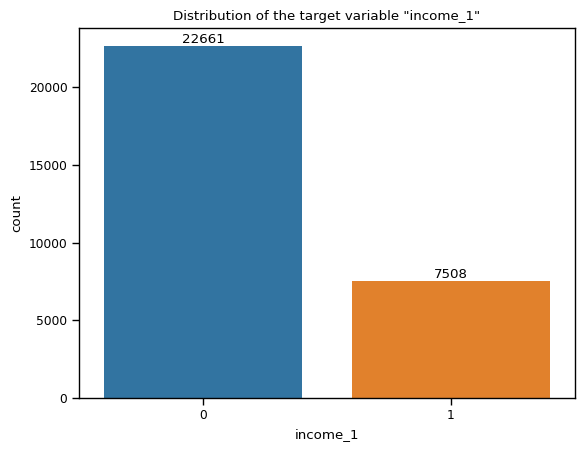

Target distribution ratio: 0.3313181236485592


In [ ]:
fig, ax = plt.subplots()
sns.countplot(x=df['income_1'])
ax.bar_label(ax.containers[0])
ax.set_title("Distribution of the target variable \"income_1\"")
plt.show()

target_counts = df['income_1'].value_counts()
target_distribution_ratio = target_counts[1]/target_counts[0]
print("Target distribution ratio:", target_distribution_ratio)

* Distribution of the target variable is imbalanced.

* This will may cause some issues about our models' ability of predicting for dfpoints which have truth value 1 for the target.

# ML

### Train test split

In [ ]:
X = df.drop(columns=['income_1'])
y = df['income_1']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Cross validation function

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

def cross_validation_results(model, name):
    k_folds = 5
    kf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

    # Lists to hold performance metrics
    train_accuracy_scores = []
    train_precision_scores = []
    train_recall_scores = []
    train_specificity_scores = []
    train_f1_scores = []

    val_accuracy_scores = []
    val_precision_scores = []
    val_recall_scores = []
    val_specificity_scores = []
    val_f1_scores = []

    # Split to folds
    for train_idx, val_idx in kf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model.fit(X_train_fold, y_train_fold)

        # Get train predictions and metrics
        train_pred = model.predict(X_train_fold)

        cm = confusion_matrix(y_train_fold, train_pred)
        TP = cm[1][1]
        TN = cm[0][0]
        FP = cm[0][1]
        FN = cm[1][0]

        train_specificity_scores.append(TN / (TN + FP))
        train_accuracy_scores.append(accuracy_score(y_train_fold, train_pred))
        train_precision_scores.append(precision_score(y_train_fold, train_pred))
        train_recall_scores.append(recall_score(y_train_fold, train_pred))
        train_f1_scores.append(f1_score(y_train_fold, train_pred))

        # Get validation predictions and metrics
        val_predictions = model.predict(X_val_fold)

        cm = confusion_matrix(y_val_fold, val_predictions)
        TP = cm[1][1]
        TN = cm[0][0]
        FP = cm[0][1]
        FN = cm[1][0]

        val_specificity_scores.append(TN / (TN + FP))
        val_accuracy_scores.append(accuracy_score(y_val_fold, val_predictions))
        val_precision_scores.append(precision_score(y_val_fold, val_predictions))
        val_recall_scores.append(recall_score(y_val_fold, val_predictions))
        val_f1_scores.append(f1_score(y_val_fold, val_predictions))

    # Mean of the performance metrics
    train_accuracy = np.mean(train_accuracy_scores)
    train_precision = np.mean(train_precision_scores)
    train_recall = np.mean(train_recall_scores)
    train_specificity = np.mean(train_specificity_scores)
    train_f1 = np.mean(train_f1_scores)

    val_accuracy = np.mean(val_accuracy_scores)
    val_precision = np.mean(val_precision_scores)
    val_recall = np.mean(val_recall_scores)7
    val_specificity = np.mean(val_specificity_scores)
    val_f1 = np.mean(val_f1_scores)

    # Return as df
    final_df = pd.DataFrame([[name + " Train", train_accuracy, train_precision, train_recall, train_specificity, train_f1],
                         [name + " Validation", val_accuracy, val_precision, val_recall, val_specificity, val_f1]],
                        columns=['Model','Accuracy','Precision','Recall','Specificity','F1'])

    final_df.set_index('Model', inplace=True)

    return final_df


* Precision = TP / (TP + FP) --> Pozitif tahmin edilenlerin ne kadarı gerçekten
pozitif
* Recall = TP / (TP + FN) --> Gerçek pozitiflerin ne kadarı doğru tahmin edilmiş
* Specifity = TN / (TN + FP) --> Gerçek negatiflerin ne kadarı doğru tahmin edilmiş

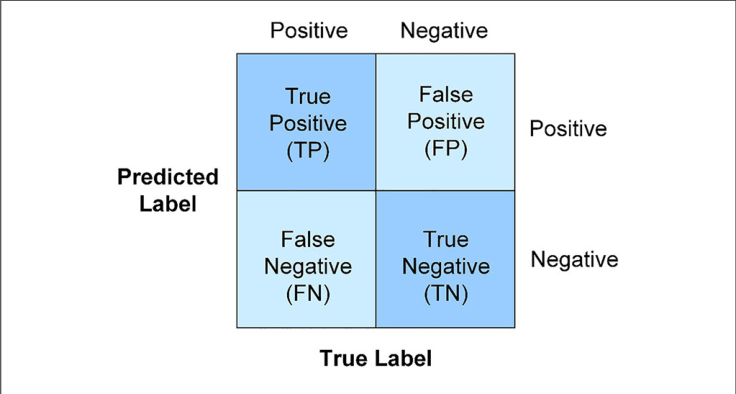

### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(random_state=0, class_weight='balanced')
rforest_cv = cross_validation_results(rforest, 'Random Forest')
rforest_cv

Accuracy  Precision    Recall  Specificity        F1
Model                                                                         
Random Forest Train       0.999941   0.999858  0.999905     0.999953  0.999881
Random Forest Validation  0.855621   0.751241  0.629890     0.930608  0.685054

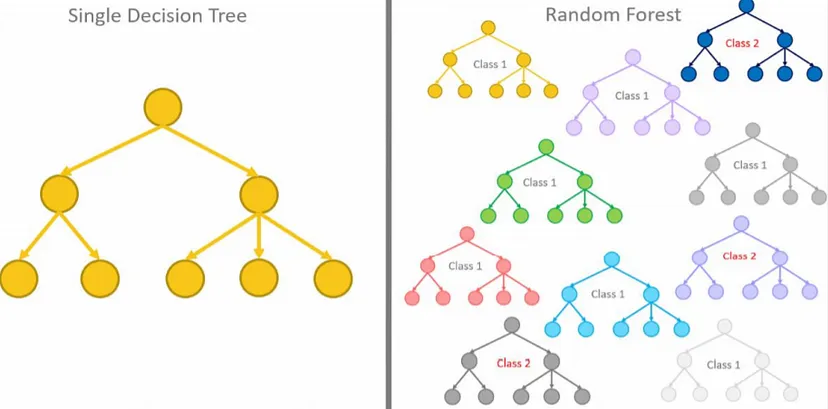

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg_cv = cross_validation_results(logreg, 'Logistic Regression')
logreg_cv

Accuracy  Precision    Recall  Specificity  \
Model                                                                        
Logistic Regression Train       0.850104   0.739239  0.616265     0.927785   
Logistic Regression Validation  0.848471   0.735772  0.612422     0.926886   

                                      F1  
Model                                     
Logistic Regression Train       0.672172  
Logistic Regression Validation  0.668395

### SVM

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm_cv = cross_validation_results(svm, 'SVM')
svm_cv

Accuracy  Precision    Recall  Specificity        F1
Model                                                               
SVM Train       0.857053   0.768658  0.610521     0.938951  0.680504
SVM Validation  0.844398   0.741007  0.578429     0.932753  0.649582

### KNN

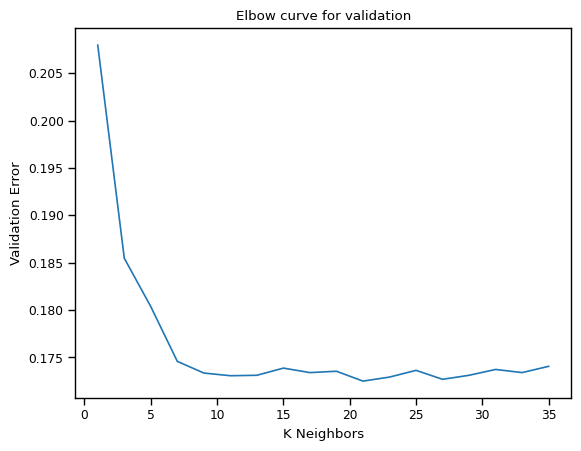

Minimum test error: 0.17250673171449282 (k=21)


Accuracy  Precision    Recall  Specificity        F1
Model                                                               
KNN Train       0.841119   0.727125  0.580849     0.927580  0.645776
KNN Validation  0.827493   0.693659  0.551842     0.919064  0.614587

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Since it is a classification, k values should be odd.
k_values = range(1,37,2)
validation_errors = []

#Testing k_values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    result = cross_validation_results(knn, 'knn')
    validation_errors.append(1-result.loc['knn Validation', 'Accuracy'])

#Plotting elbow curve
fig, ax = plt.subplots()
ax.plot(k_values, validation_errors)
ax.set_ylabel('Validation Error')
ax.set_xlabel('K Neighbors')
plt.title("Elbow curve for validation")
plt.show()

#Choosing the best model
#Choosing the best k with the list indexes
min_val_error = min(validation_errors)
best_k = validation_errors.index(min_val_error)*2+1

print(f"Minimum test error: {min_val_error} (k={best_k})")

#Create new model from best k
knn = KNeighborsClassifier(n_neighbors=best_k)

#Cross validation
knn_cv = cross_validation_results(knn, 'KNN')
knn_cv

### XGBoost

In [ ]:
from xgboost.sklearn import XGBClassifier

xgb = XGBClassifier(random_state=42)

xgb_cv = cross_validation_results(xgb, 'XGB')
xgb_cv

Accuracy  Precision    Recall  Specificity        F1
Model                                                               
XGB Train       0.912373   0.869807  0.762771     0.962071  0.812771
XGB Validation  0.867175   0.771932  0.663692     0.934772  0.713583

### Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)

# Create the AdaBoostClassifier
adaboost = AdaBoostClassifier(estimator=base_estimator, random_state=42)

adaboost_cv = cross_validation_results(adaboost, 'Ada Boost')
adaboost_cv

Accuracy  Precision    Recall  Specificity        F1
Model                                                                     
Ada Boost Train       0.857977   0.769902  0.614413     0.938888  0.683260
Ada Boost Validation  0.855953   0.762512  0.613372     0.936538  0.679785

### MLP(multi-layer perceptron)

In [ ]:
import tensorflow as tf
from tensorflow import keras

X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0)

mlp = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),  # Adding dropout for regularization
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)  # Binary classification, use sigmoid activation
])

mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

mlp.fit(X_train_new, y_train_new, validation_data=(X_val, y_val), epochs=50, validation_split=0.2, callbacks=[early_stopping])

# Get performance metrics
y_pred = mlp.predict(X_val)
y_pred_binary = np.round(y_pred).flatten()

cm = confusion_matrix(y_val, y_pred_binary)
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

val_specificity = (TN / (TN + FP))
val_accuracy = (accuracy_score(y_val, y_pred_binary))
val_precision = (precision_score(y_val, y_pred_binary))
val_recall = (recall_score(y_val, y_pred_binary))
val_f1 = (f1_score(y_val, y_pred_binary))

y_pred = mlp.predict(X_train_new)
y_pred_binary = np.round(y_pred).flatten()

cm = confusion_matrix(y_train_new, y_pred_binary)
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

train_specificity = (TN / (TN + FP))
train_accuracy = (accuracy_score(y_train_new, y_pred_binary))
train_precision = (precision_score(y_train_new, y_pred_binary))
train_recall = (recall_score(y_train_new, y_pred_binary))
train_f1 = (f1_score(y_train_new, y_pred_binary))

mlp_cv = pd.DataFrame([["MLP Validation", val_accuracy, val_precision, val_recall, val_specificity, val_f1],
                ["MLP Train", train_accuracy, train_precision, train_recall, train_f1, train_f1]],
            columns=['Model','Accuracy','Precision','Recall','Specificity','F1'])
mlp_cv.set_index('Model', inplace=True)

mlp_cv

Epoch 1/50
462/462 [==============================] - 2s 3ms/step - loss: 0.3753 - accuracy: 0.8205 - val_loss: 0.3331 - val_accuracy: 0.8488
Epoch 2/50
462/462 [==============================] - 1s 3ms/step - loss: 0.3350 - accuracy: 0.8420 - val_loss: 0.3284 - val_accuracy: 0.8505
Epoch 3/50
462/462 [==============================] - 1s 2ms/step - loss: 0.3267 - accuracy: 0.8465 - val_loss: 0.3216 - val_accuracy: 0.8518
Epoch 4/50
462/462 [==============================] - 1s 2ms/step - loss: 0.3183 - accuracy: 0.8519 - val_loss: 0.3235 - val_accuracy: 0.8504
Epoch 5/50
462/462 [==============================] - 1s 2ms/step - loss: 0.3139 - accuracy: 0.8531 - val_loss: 0.3263 - val_accuracy: 0.8510
Epoch 6/50
462/462 [==============================] - 1s 2ms/step - loss: 0.3131 - accuracy: 0.8556 - val_loss: 0.3219 - val_accuracy: 0.8502
Epoch 7/50
462/462 [==============================] - 1s 2ms/step - loss: 0.3102 - accuracy: 0.8572 - val_loss: 0.3233 - val_accuracy: 0.8505
Epoch 

Accuracy  Precision    Recall  Specificity        F1
Model                                                               
MLP Validation  0.851010   0.748132  0.622512     0.928723  0.679566
MLP Train       0.863415   0.769484  0.639694     0.698612  0.698612

In [ ]:
combined_df = pd.concat([rforest_cv.loc['Random Forest Validation'],
                         logreg_cv.loc['Logistic Regression Validation'],
                         svm_cv.loc['SVM Validation'],
                         knn_cv.loc['KNN Validation'],
                         xgb_cv.loc['XGB Validation'],
                         adaboost_cv.loc['Ada Boost Validation'],
                         mlp_cv.loc['MLP Validation']], axis=1).T
combined_df

Accuracy  Precision    Recall  Specificity  \
Random Forest Validation        0.855621   0.751241  0.629890     0.930608   
Logistic Regression Validation  0.848471   0.735772  0.612422     0.926886   
SVM Validation                  0.844398   0.741007  0.578429     0.932753   
KNN Validation                  0.827493   0.693659  0.551842     0.919064   
XGB Validation                  0.867175   0.771932  0.663692     0.934772   
Ada Boost Validation            0.855953   0.762512  0.613372     0.936538   
MLP Validation                  0.851010   0.748132  0.622512     0.928723   

                                      F1  
Random Forest Validation        0.685054  
Logistic Regression Validation  0.668395  
SVM Validation                  0.649582  
KNN Validation                  0.614587  
XGB Validation                  0.713583  
Ada Boost Validation            0.679785  
MLP Validation                  0.679566

### XGB için test seti ile elde edilen performans metrikleri

In [ ]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
xgb_y_pred = xgb.predict(X_test)

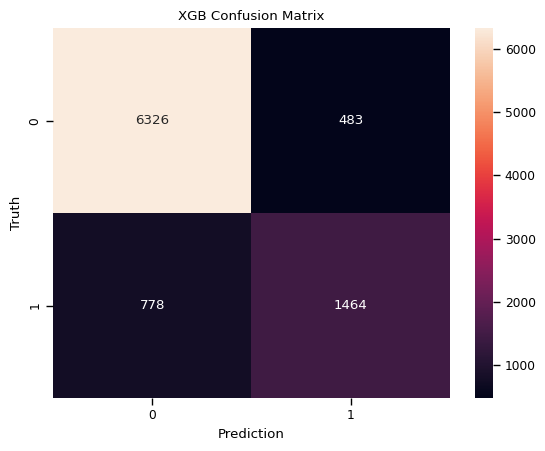

In [ ]:
from sklearn.metrics import confusion_matrix

xgb_cm = confusion_matrix(y_test, xgb_y_pred)

fig, ax = plt.subplots()

sns.heatmap(xgb_cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Prediction')
ax.set_ylabel('Truth')
ax.set_title('XGB Confusion Matrix')

plt.show()

* Precision = TP / (TP + FP) --> Pozitif tahmin edilenlerin ne kadarı gerçekten pozitif
* Recall = TP / (TP + FN) --> Gerçek pozitiflerin ne kadarı doğru tahmin edilmiş
* Specifity = TN / (TN + FP) --> Gerçek negatiflerin ne kadarı doğru tahmin edilmiş

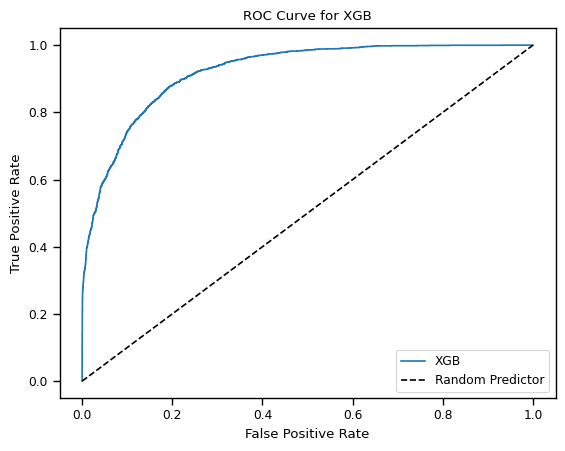

auc_roc: 0.9220136045473739


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fig, ax = plt.subplots()

# ROC curve for XGB
xgb_y_pred_proba = xgb.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test,  xgb_y_pred_proba)
xgb_auc_roc = roc_auc_score(y_test, xgb_y_pred_proba)

ax.plot(fpr, tpr, label='XGB')
ax.plot([0,1], [0,1], "k--", label='Random Predictor')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve for XGB')
ax.legend()

plt.show()

print("auc_roc: " + str(xgb_auc_roc))

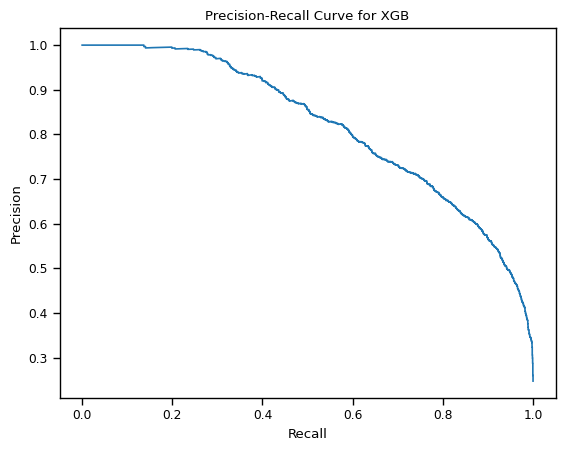

auc_pr: 0.819691093197977


In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

fig, ax = plt.subplots()

# Precision-recall curve for xgb
precision, recall, thresholds = precision_recall_curve(y_test, xgb_y_pred_proba)
xgb_auc_pr = auc(recall, precision)

ax.plot(recall, precision)
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall Curve for XGB')

plt.show()

print("auc_pr: " + str(xgb_auc_pr))

In [ ]:
accuracy = accuracy_score(y_test, xgb_y_pred)
precision = precision_score(y_test, xgb_y_pred)
recall = recall_score(y_test, xgb_y_pred)

TP = xgb_cm[1][1]
TN = xgb_cm[0][0]
FP = xgb_cm[0][1]
FN = xgb_cm[1][0]

specificity = TN / (TN + FP)
f1 = f1_score(y_test, xgb_y_pred)

results = pd.DataFrame([["XGB Test", accuracy, precision, recall, specificity, f1, xgb_auc_roc, xgb_auc_pr]],
             columns=['Model', 'Accuracy', 'Precision', 'Recall', 'Specificity', 'F1', 'AUC ROC', 'AUC P-R'])

results

Model  Accuracy  Precision    Recall  Specificity        F1   AUC ROC  \
0  XGB Test  0.860678   0.751926  0.652988     0.929064  0.698974  0.922014   

    AUC P-R  
0  0.819691